In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
import re
import requests
from sklearn import tree

import nltk
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
import plotly.express as px

In [2]:
df=pd.read_csv('Desktop/cleaned_data.csv')
df.dtypes

Unnamed: 0        int64
Title            object
Risk              int64
URL              object
cleaned_title    object
dtype: object

In [3]:
x=df['cleaned_title']
y=df['Risk']


In [4]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x)
x = vectorizer.transform(x)


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10)

The accuracy of Logistic regression is 0.667
The precision of the Logistic regression is 0.647
The recall score of the Logistic regression is 0.917
The roc auc score of the Logistic regression  is 0.625
[[ 3  6]
 [ 1 11]]


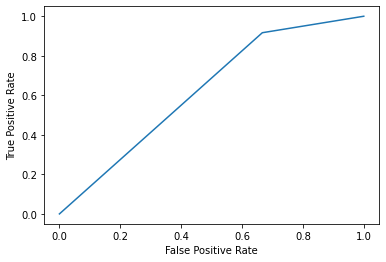

In [6]:
log= LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test) 
print("The accuracy of Logistic regression is","{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))
print("The precision of the Logistic regression is","{:.3f}".format(metrics.precision_score(y_test,y_pred)))
print("The recall score of the Logistic regression is","{:.3f}".format(metrics.recall_score(y_test,y_pred)))
print("The roc auc score of the Logistic regression  is","{:.3f}".format(metrics.roc_auc_score(y_test,y_pred)))
log_acc=metrics.accuracy_score(y_pred,y_test)
log_prec=metrics.precision_score(y_pred,y_test)
log_rec=metrics.recall_score(y_pred,y_test)
log_auc=metrics.roc_auc_score(y_pred,y_test)
log_conf=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()
#print(classification_report(y_test, y_pred))

The accuracy of the MNB is 0.714
The precision of the MNB is 0.714
The recall score of the MNB is 0.833
The roc auc score of the MNB model is 0.694
[[ 5  4]
 [ 2 10]]


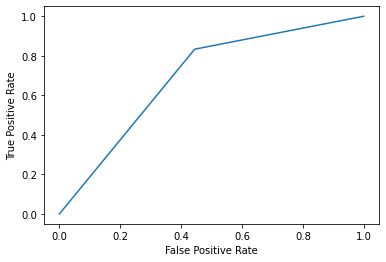

In [7]:
#Multinomial NB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)

print("The accuracy of the MNB is","{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))
print("The precision of the MNB is","{:.3f}".format(metrics.precision_score(y_test,y_pred)))
print("The recall score of the MNB is","{:.3f}".format(metrics.recall_score(y_test,y_pred)))
print("The roc auc score of the MNB model is","{:.3f}".format(metrics.roc_auc_score(y_test,y_pred)))
mnb_acc=metrics.accuracy_score(y_pred,y_test)
mnb_prec=metrics.precision_score(y_pred,y_test)
mnb_rec=metrics.recall_score(y_pred,y_test)
mnb_auc=metrics.roc_auc_score(y_pred,y_test)
mnb_conf=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()
#print(classification_report(y_test, y_pred))

The accuracy of the Decision Tree is 0.810
The precision of the Decision Tree is 0.786
The recall score of the Decision Tree is 0.917
The roc auc score of the Decision tree model is 0.792
[[ 6  3]
 [ 1 11]]


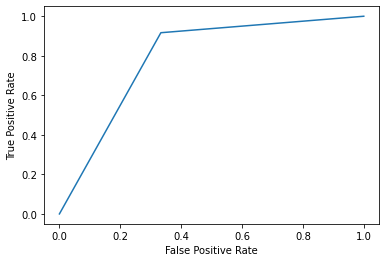

In [8]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))
print("The precision of the Decision Tree is","{:.3f}".format(metrics.precision_score(y_test,y_pred)))
print("The recall score of the Decision Tree is","{:.3f}".format(metrics.recall_score(y_test,y_pred)))
print("The roc auc score of the Decision tree model is","{:.3f}".format(metrics.roc_auc_score(y_test,y_pred)))
dec_t_acc=metrics.accuracy_score(y_pred,y_test)
dec_t_prec=metrics.precision_score(y_pred,y_test)
dec_t_rec=metrics.recall_score(y_pred,y_test)
dec_t_auc=metrics.roc_auc_score(y_pred,y_test)
dec_t_conf=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()
#print(classification_report(y_test, y_pred))

The accuracy of the GBC is 0.762
The precision of the GBC is 0.733
The recall score of GBC is 0.917
The roc auc score of GBC is 0.736
[[ 5  4]
 [ 1 11]]


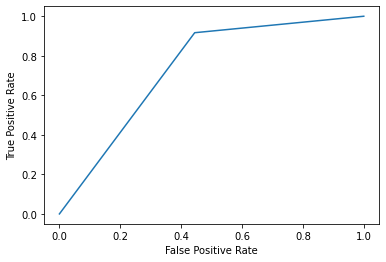

              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.73      0.92      0.81        12

    accuracy                           0.76        21
   macro avg       0.78      0.74      0.74        21
weighted avg       0.78      0.76      0.75        21

              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.73      0.92      0.81        12

    accuracy                           0.76        21
   macro avg       0.78      0.74      0.74        21
weighted avg       0.78      0.76      0.75        21



In [9]:
#Gradient boosting classifier

clf= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=10).fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("The accuracy of the GBC is","{:.3f}".format(metrics.accuracy_score(y_test,y_pred)))
print("The precision of the GBC is","{:.3f}".format(metrics.precision_score(y_test,y_pred)))
print("The recall score of GBC is","{:.3f}".format(metrics.recall_score(y_test,y_pred)))
print("The roc auc score of GBC is","{:.3f}".format(metrics.roc_auc_score(y_test,y_pred)))

gbc_acc=metrics.accuracy_score(y_pred,y_test)
gbc_prec=metrics.precision_score(y_pred,y_test)
gbc_rec=metrics.recall_score(y_pred,y_test)
gbc_auc=metrics.roc_auc_score(y_pred,y_test)
gbc_conf=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy of the BNB is 0.714
The precision of the BNB is 0.800
The recall score of BNB is 0.667
The roc auc score of BNB is 0.722
[[7 2]
 [4 8]]


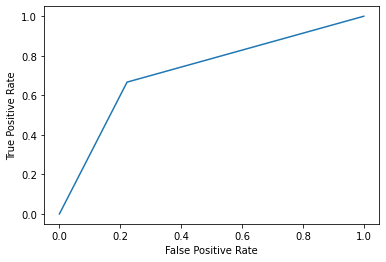

In [10]:
#Bernouilli NB

from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=0.1, fit_prior=False)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("The accuracy of the BNB is","{:.3f}".format(metrics.accuracy_score(y_test,y_pred)))
print("The precision of the BNB is","{:.3f}".format(metrics.precision_score(y_test,y_pred)))
print("The recall score of BNB is","{:.3f}".format(metrics.recall_score(y_test,y_pred)))
print("The roc auc score of BNB is","{:.3f}".format(metrics.roc_auc_score(y_test,y_pred)))
bnb_acc=metrics.accuracy_score(y_pred,y_test)
bnb_prec=metrics.precision_score(y_pred,y_test)
bnb_rec=metrics.recall_score(y_pred,y_test)
bnb_auc=metrics.roc_auc_score(y_pred,y_test)
bnb_conf=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()
#print(classification_report(y_test, y_pred))

The accuracy of the Extra Tree classifier is 0.762
The precision of the Extra Tree classifier is 0.769
The recall score of Extra Tree classifier is 0.833
The roc auc score of Extra Tree classifier is 0.750
[[ 6  3]
 [ 2 10]]


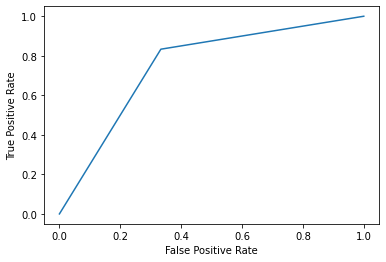

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.77      0.83      0.80        12

    accuracy                           0.76        21
   macro avg       0.76      0.75      0.75        21
weighted avg       0.76      0.76      0.76        21



In [11]:
#Extra Trees

from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("The accuracy of the Extra Tree classifier is","{:.3f}".format(metrics.accuracy_score(y_test,y_pred)))
print("The precision of the Extra Tree classifier is","{:.3f}".format(metrics.precision_score(y_test,y_pred)))
print("The recall score of Extra Tree classifier is","{:.3f}".format(metrics.recall_score(y_test,y_pred)))
print("The roc auc score of Extra Tree classifier is","{:.3f}".format(metrics.roc_auc_score(y_test,y_pred)))
ex_tree_acc=metrics.accuracy_score(y_pred,y_test)
ex_tree_prec=metrics.precision_score(y_pred,y_test)
ex_tree_rec=metrics.recall_score(y_pred,y_test)
ex_tree_auc=metrics.roc_auc_score(y_pred,y_test)
ex_tree_conf=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()
print(classification_report(y_test, y_pred))

In [12]:
test = vectorizer.transform(["Huntsman falls after J.P. Morgan downgrades to Underweight on earnings cut"])

In [13]:
tree.predict(test)

array([0], dtype=int64)

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_pred,y_test)
metrics.precision_score(y_pred,y_test)
metrics.recall_score(y_pred,y_test)
metrics.roc_auc_score(y_pred,y_test)
metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  3]
 [ 2 10]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.77      0.83      0.80        12

    accuracy                           0.76        21
   macro avg       0.76      0.75      0.75        21
weighted avg       0.76      0.76      0.76        21



In [15]:
"""from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5,verbosity=2,config_dict = 'TPOT sparse')
tpot.fit(x_train,
         y_train)"""

"from tpot import TPOTClassifier\ntpot = TPOTClassifier(generations=5,verbosity=2,config_dict = 'TPOT sparse')\ntpot.fit(x_train,\n         y_train)"

In [16]:
#tpot.score(x_test,y_test)

In [21]:
comp=pd.DataFrame({'Classifier':['LogisticRegression','MultinomialNB','Decision Tree Classifier','GradientBoostingClassifier','BernoulliNB','ExtraTreesClassifier'],
                   'Accuracy':[log_acc,mnb_acc,dec_t_acc,gbc_acc,bnb_acc,ex_tree_acc],
                   'Precision':[log_prec,mnb_prec,dec_t_prec,gbc_prec,bnb_prec,ex_tree_prec],
                   'Recall':[log_rec,mnb_rec,dec_t_rec,gbc_rec,bnb_rec,ex_tree_rec],
                   'AUC score':[log_auc,mnb_auc,dec_t_auc,gbc_auc,bnb_auc,ex_tree_auc]})

comp.set_index('Classifier',inplace=True)

comp.style.format({
    'Accuracy': '{:,.2%}'.format,
    'Precision': '{:,.2%}'.format,
    'Recall': '{:,.2%}'.format,
    'AUC score': '{:,.2%}'.format
    
})




,Accuracy,Precision,Recall,AUC score
Classifier,,,,
LogisticRegression,66.67%,91.67%,64.71%,69.85%
MultinomialNB,71.43%,83.33%,71.43%,71.43%
Decision Tree Classifier,80.95%,91.67%,78.57%,82.14%
GradientBoostingClassifier,76.19%,91.67%,73.33%,78.33%
BernoulliNB,71.43%,66.67%,80.00%,71.82%
ExtraTreesClassifier,76.19%,83.33%,76.92%,75.96%


In [28]:
fig = px.bar(comp, title="Classifier comparisons",barmode="group",template='plotly_dark')
fig.update_traces( marker_line_color='rgb(8,48,107)',
                  marker_line_width=3)
fig.update_xaxes(showgrid=False,color='gold',title_font=dict(size=20))
fig.update_yaxes(showgrid=False,color='gold',title_font=dict(size=20))
fig.update_layout(title_font_color="gold",
    title={
        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()